In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')
# print(df.head())

In [21]:
# Filter out all the movies
movies = df[df.type == 'Movie']

# remove columns
movies = movies[['title','release_year','duration', 'listed_in']]
# print(movies)

# get the duration in number format
split_duration = movies.duration.str.split('(\d+)', expand=True)
movies.duration = split_duration[1]
movies['duration'] = pd.to_numeric(movies.duration)
# movies = movies.dropna()

durations = movies.groupby('release_year').duration.mean().reset_index()
durations.columns = ['release_year', 'average_duration']
# print(durations)

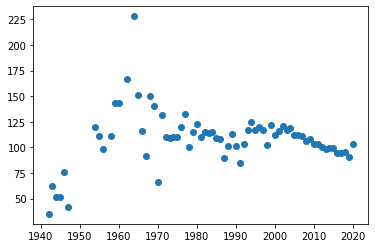

In [3]:
plt.scatter(durations.release_year, durations.average_duration)

In [16]:
# print(movies.head)

# Split genres into individual strings and convert them into lists
listed_in = movies.listed_in.str.split(', ', expand=True)
list_of_genres_0 = listed_in[0].to_list()
list_of_genres_1 = listed_in[1].to_list()
list_of_genres_2 = listed_in[2].to_list()

# combine all these lists and remove all the duplicated genres
list_of_genres = list_of_genres_0 + list_of_genres_1 + list_of_genres_2
unique_genres = [] 
for i in list_of_genres: 
    if i not in unique_genres: 
        unique_genres.append(i) 
print(unique_genres)


['Children & Family Movies', 'Stand-Up Comedy', 'Comedies', 'International Movies', 'Action & Adventure', 'Cult Movies', 'Documentaries', 'Horror Movies', 'Dramas', 'Anime Features', 'Independent Movies', 'Movies', 'Thrillers', 'Classic Movies', 'Music & Musicals', 'Sci-Fi & Fantasy', 'Sports Movies', 'Romantic Movies', None, 'LGBTQ Movies', 'Faith & Spirituality']


In [22]:
print(movies.head())


durations = movies.groupby('release_year').duration.mean().reset_index()

                                     title  release_year  duration  \
0  Norm of the North: King Sized Adventure          2019        90   
1               Jandino: Whatever it Takes          2016        94   
4                             #realityhigh          2017        99   
6                                 Automata          2014       110   
7       Fabrizio Copano: Solo pienso en mi          2017        60   

                                           listed_in  
0                 Children & Family Movies, Comedies  
1                                    Stand-Up Comedy  
4                                           Comedies  
6  International Movies, Sci-Fi & Fantasy, Thrillers  
7                                    Stand-Up Comedy  
